In [26]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [27]:


df = pd.read_csv("/home/piai/바탕화면/B3_반도체/control_para.csv", encoding='utf-8')
df



,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [28]:
def Err(x) :
    if x >= 195 :
        return 1
    else :
        return 0

df['Error']=df['Target'].apply(Err)

In [29]:
df['type'] = df['type'].replace({'dry': 1, 'wet': 0})
df.head()

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path,Error
0,0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,...,854,154,Inspect,141,13,28,01-03-2022,21111,2111,0
1,1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,...,895,156,Inspect,55,13,29,01-03-2022,21122,2112,0
2,2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,...,898,152,Inspect,96,13,30,01-03-2022,21133,2113,0
3,3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,...,879,155,Inspect,105,13,31,01-03-2022,21111,2111,0
4,4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,...,882,155,Inspect,79,13,32,01-03-2022,21122,2112,0


In [30]:


df = df.drop(["No_Die", "process","process 2","Process 2-1", "Process 3", "process4", "process4.1", "Target", "Lot_Num", "Wafer_Num", "path", "short_path", "Datetime"], axis=1)
df.head()



,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,time_softbake,Wavelength,Energy_Exposure,Temp_Etching,Source_Power,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Error
0,0,1,1214.307948,26.69,0.203,120,17.367,15.006,20.001,200.551,...,30.005,365,109.628,72.651,52.103,30795.934,103.433,854,154,0
1,1,1,978.110792,30.86,0.217,137,16.090,15.059,19.993,199.835,...,30.005,405,104.917,70.267,52.004,32135.618,105.552,895,156,0
2,2,1,1176.019149,31.07,0.218,116,19.026,14.930,19.995,202.118,...,30.006,365,106.632,71.231,50.846,31057.895,102.598,898,152,0
3,3,1,933.442733,31.04,0.196,143,18.891,14.947,20.004,194.668,...,30.001,436,108.785,71.295,51.665,32140.566,102.963,879,155,0
4,4,0,1140.598752,31.37,0.215,76,13.788,14.820,19.998,202.192,...,29.988,405,109.913,72.983,50.787,31986.009,101.419,882,155,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1668 non-null   int64  
 1   type               1668 non-null   int64  
 2   Temp_OXid          1668 non-null   float64
 3   ppm                1668 non-null   float64
 4   Pressure           1668 non-null   float64
 5   Oxid_time          1668 non-null   int64  
 6   N2_HMDS            1668 non-null   float64
 7   pressure_HMDS      1668 non-null   float64
 8   temp_HMDS          1668 non-null   float64
 9   temp_HMDS_bake     1668 non-null   float64
 10  time_HMDS_bake     1668 non-null   float64
 11  spin1              1668 non-null   float64
 12  spin2              1668 non-null   float64
 13  spin3              1668 non-null   float64
 14  photoresist_bake   1668 non-null   float64
 15  temp_softbake      1668 non-null   float64
 16  time_softbake      1668 

In [32]:
columns_to_scale = ['type', 'Temp_OXid', 'ppm', 'Pressure',
              'Oxid_time', 'N2_HMDS', 'pressure_HMDS',
              'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
              'spin1', 'spin2', 'spin3',
              'photoresist_bake', 'temp_softbake', 'time_softbake',
              'Wavelength', 'Energy_Exposure', 'Temp_Etching',
              'Source_Power', 'input_Energy', 'Temp_implantation',
              'Furance_Temp', 'RTA_Temp']
              
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,time_softbake,Wavelength,Energy_Exposure,Temp_Etching,Source_Power,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Error
0,0,0.847241,0.973137,-0.826318,-0.841322,0.288973,0.578151,0.034024,0.406844,0.004482,...,0.700356,-1.368716,1.002975,1.882420,1.341676,-2.061593,0.158206,-2.534985,-0.289833,0
1,1,0.847241,-0.601412,-0.311951,0.671231,0.523433,0.008660,0.715766,-1.769080,-0.244258,...,0.700356,0.019728,-2.087892,-1.117299,1.187501,0.215889,1.439966,-0.328175,0.542253,0
2,2,0.847241,0.717895,-0.286048,0.779271,0.233806,1.317998,-0.943569,-1.225099,0.548859,...,0.862380,-1.368716,-0.962687,0.095675,-0.615881,-1.616256,-0.346876,-0.166701,-1.121920,0
3,3,0.847241,-0.899181,-0.289748,-1.597599,0.606183,1.257794,-0.724897,1.222816,-2.039279,...,0.052260,1.095772,0.449887,0.176204,0.659568,0.224301,-0.126092,-1.189369,0.126210,0
4,4,-1.180302,0.481773,-0.249043,0.455152,-0.317863,-1.017939,-2.358505,-0.409127,0.574567,...,-2.054054,0.019728,1.189962,2.300166,-0.707763,-0.038449,-1.060041,-1.027895,0.126210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,-1.180302,1.378942,1.444544,0.347113,-1.076409,-0.018543,0.021161,-0.409127,1.351703,...,-0.757861,-1.368716,-0.889205,0.497063,-0.997425,0.407996,-1.009230,-1.781440,-1.121920,0
1664,1664,-1.180302,1.331765,1.440843,0.455152,-1.062617,0.676262,-0.699170,0.134854,1.295077,...,-1.081909,-1.368716,-1.263179,-0.549819,-1.273071,0.395764,-1.276591,-1.835265,-1.121920,0
1665,1665,-1.180302,1.405461,1.447011,0.347113,-1.076409,0.166976,-0.326142,-1.497090,0.994575,...,-1.405957,-1.368716,-1.306482,0.176204,-0.995868,0.402816,-1.007415,-1.781440,-1.121920,0
1666,1666,-1.180302,1.363093,1.474147,0.239073,-1.090200,-0.340972,0.599998,0.678835,1.088026,...,1.024404,-1.368716,-0.875427,0.055410,-1.086192,0.426341,-1.095729,-1.781440,-1.121920,0


In [33]:
# train / test 데이터 분할

df_train, df_test = train_test_split(df_scaled,test_size=0.4, random_state=1004)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))



train data size : (1000, 26)
test data size : (668, 26)


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 구하기 위한 변수 설정
X = df_train_x[['type', 'Temp_OXid', 'ppm', 'Pressure',
              'Oxid_time', 'N2_HMDS', 'pressure_HMDS',
              'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
              'spin1', 'spin2', 'spin3',
              'photoresist_bake', 'temp_softbake', 'time_softbake',
              'Wavelength', 'Energy_Exposure', 'Temp_Etching',
              'Source_Power', 'input_Energy', 'Temp_implantation',
              'Furance_Temp', 'RTA_Temp']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

              feature       VIF
0                type  1.755867
1           Temp_OXid  3.036697
2                 ppm  2.629254
3            Pressure  1.374211
4           Oxid_time  1.444199
5             N2_HMDS  1.044978
6       pressure_HMDS  1.037303
7           temp_HMDS  1.014698
8      temp_HMDS_bake  1.582572
9      time_HMDS_bake  1.035306
10              spin1  1.530062
11              spin2  1.414090
12              spin3  1.701307
13   photoresist_bake  1.581131
14      temp_softbake  1.534797
15      time_softbake  1.029978
16         Wavelength  1.514515
17    Energy_Exposure  1.638765
18       Temp_Etching  1.252772
19       Source_Power  1.694445
20       input_Energy  1.223655
21  Temp_implantation  1.714724
22       Furance_Temp  1.326363
23           RTA_Temp  1.816460


In [36]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + Source_Power + input_Energy + 
Temp_implantation + Furance_Temp +RTA_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233060
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      975
Method:                           MLE   Df Model:                           24
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1783
Time:                        16:55:13   Log-Likelihood:                -233.06
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 1.924e-11
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0362      0.177    -17.168      0.000      -3.383      -2.690
type    

pressure_HMDS         0.0005      0.133      0.004      0.997      -0.260       0.261 제거

In [41]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + Source_Power + input_Energy + 
Temp_implantation + Furance_Temp +RTA_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233060
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      976
Method:                           MLE   Df Model:                           23
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1783
Time:                        16:59:52   Log-Likelihood:                -233.06
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 8.965e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0362      0.177    -17.175      0.000      -3.383      -2.690
type    

Source_Power         -0.0172      0.167     -0.103      0.918      -0.344       0.310 제거

In [42]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp +RTA_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233065
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      977
Method:                           MLE   Df Model:                           22
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1783
Time:                        17:00:40   Log-Likelihood:                -233.07
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 4.102e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0355      0.177    -17.188      0.000      -3.382      -2.689
type    

RTA_Temp             -0.0283      0.178     -0.159      0.873      -0.376       0.320 제거

In [43]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233078
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      978
Method:                           MLE   Df Model:                           21
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1782
Time:                        17:01:20   Log-Likelihood:                -233.08
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 1.845e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0364      0.177    -17.192      0.000      -3.383      -2.690
type    

spin3                 0.0414      0.180      0.230      0.818      -0.312       0.394 제거

In [44]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233105
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      979
Method:                           MLE   Df Model:                           20
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1781
Time:                        17:01:59   Log-Likelihood:                -233.10
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 8.185e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0352      0.176    -17.205      0.000      -3.381      -2.689
type    

ppm                  -0.0803      0.203     -0.395      0.693      -0.479       0.318 제거

In [45]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233183
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                           19
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1779
Time:                        17:07:06   Log-Likelihood:                -233.18
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 3.696e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0324      0.176    -17.245      0.000      -3.377      -2.688
type    

spin2                -0.0632      0.154     -0.411      0.681      -0.364       0.238 제거

In [46]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233267
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           18
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1776
Time:                        17:07:53   Log-Likelihood:                -233.27
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 1.634e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0332      0.176    -17.243      0.000      -3.378      -2.688
type    

temp_HMDS_bake       -0.0806      0.166     -0.485      0.628      -0.407       0.245 제거

In [47]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS + time_HMDS_bake + spin1 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233384
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                           17
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1771
Time:                        17:08:45   Log-Likelihood:                -233.38
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 7.229e-14
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0309      0.176    -17.255      0.000      -3.375      -2.687
type    

Oxid_time            -0.0296      0.131     -0.226      0.821      -0.287       0.228 제거

In [48]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + time_HMDS_bake + spin1 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Energy_Exposure + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233409
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1771
Time:                        17:09:39   Log-Likelihood:                -233.41
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 2.870e-14
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0302      0.176    -17.254      0.000      -3.374      -2.686
type    

Energy_Exposure      -0.0477      0.157     -0.303      0.762      -0.356       0.260 제거

In [49]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + time_HMDS_bake + spin1 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Temp_Etching + input_Energy + 
Temp_implantation + Furance_Temp""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233455
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                           15
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1769
Time:                        17:10:31   Log-Likelihood:                -233.46
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 1.123e-14
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0328      0.176    -17.255      0.000      -3.377      -2.688
type    

Furance_Temp         -0.0720      0.129     -0.557      0.578      -0.326       0.182 제거

In [50]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + time_HMDS_bake + spin1 +photoresist_bake + 
temp_softbake + time_softbake +Wavelength + Temp_Etching + input_Energy + 
Temp_implantation""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233609
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1763
Time:                        17:11:01   Log-Likelihood:                -233.61
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 4.669e-15
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0446      0.176    -17.324      0.000      -3.389      -2.700
type    

temp_softbake        -0.1105      0.154     -0.716      0.474      -0.413       0.192

In [51]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + time_HMDS_bake + spin1 +photoresist_bake + 
time_softbake +Wavelength + Temp_Etching + input_Energy + 
Temp_implantation""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.233867
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1754
Time:                        17:11:35   Log-Likelihood:                -233.87
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 2.054e-15
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0463      0.176    -17.310      0.000      -3.391      -2.701
type    

time_HMDS_bake       -0.0947      0.127     -0.746      0.455      -0.343       0.154 제거

In [52]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + spin1 +photoresist_bake + 
time_softbake +Wavelength + Temp_Etching + input_Energy + 
Temp_implantation""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.234145
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           12
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1745
Time:                        17:12:07   Log-Likelihood:                -234.15
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 8.882e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.0441      0.176    -17.327      0.000      -3.388      -2.700
type    

Temp_implantation     0.2365      0.159      1.484      0.138      -0.076       0.549 제거

In [53]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + spin1 +photoresist_bake + 
time_softbake +Wavelength + Temp_Etching + input_Energy""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.235257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1705
Time:                        17:12:49   Log-Likelihood:                -235.26
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 7.878e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.0108      0.171    -17.604      0.000      -3.346      -2.676
type       

time_softbake        0.1949      0.132      1.480      0.139      -0.063       0.453 제거

In [54]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS + spin1 +photoresist_bake + 
Wavelength + Temp_Etching + input_Energy""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.236362
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1666
Time:                        17:13:17   Log-Likelihood:                -236.36
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 6.736e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9853      0.168    -17.726      0.000      -3.315      -2.655
type       

spin1               -0.2071      0.143     -1.452      0.147      -0.487       0.072 제거

In [55]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS + 
temp_HMDS +photoresist_bake + 
Wavelength + Temp_Etching + input_Energy""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1630
Time:                        17:13:40   Log-Likelihood:                -237.40
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 5.236e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9772      0.168    -17.745      0.000      -3.306      -2.648
type       

temp_HMDS            0.1939      0.131      1.477      0.140      -0.063       0.451 제거

In [56]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure + N2_HMDS +photoresist_bake + 
Wavelength + Temp_Etching + input_Energy""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1591
Time:                        17:14:11   Log-Likelihood:                -238.50
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 4.131e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9588      0.166    -17.811      0.000      -3.284      -2.633
type       

N2_HMDS             -0.2101      0.137     -1.530      0.126      -0.479       0.059 제거

In [57]:
# 로지스틱 회귀 모델 (1)

log_model = Logit.from_formula("""Error ~ type + Temp_OXid + Pressure +photoresist_bake + 
Wavelength + Temp_Etching + input_Energy""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.239667
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1550
Time:                        17:14:33   Log-Likelihood:                -239.67
converged:                       True   LL-Null:                       -283.63
Covariance Type:            nonrobust   LLR p-value:                 3.305e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9297      0.162    -18.059      0.000      -3.248      -2.612
type       

In [59]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과\n",y_pred_train_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_train["Error"],y_pred_train_class)),"\n")

y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과\n",y_pred_test_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_test["Error"],y_pred_test_class)),"\n")


Train 예측 결과
 1486    0
454     0
50      0
1120    0
425     0
dtype: int64 

Confusionmatrix:
[[916   2]
 [ 70  12]] 

Test 예측 결과
 1014    0
1576    0
122     0
94      0
550     0
dtype: int64 

Confusionmatrix:
[[627   2]
 [ 36   3]] 



In [60]:
print("Train 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_train["Error"],y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["Error"],y_pred_train_class),"\n"))
print(classification_report(df_train["Error"],y_pred_train_class, digits=3))


print("Test 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_test["Error"],y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["Error"],y_pred_test_class),"\n"))
print(classification_report(df_test["Error"],y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.928000

Confusion Matrix: 
[[916   2]
 [ 70  12]]
              precision    recall  f1-score   support

           0      0.929     0.998     0.962       918
           1      0.857     0.146     0.250        82

    accuracy                          0.928      1000
   macro avg      0.893     0.572     0.606      1000
weighted avg      0.923     0.928     0.904      1000

Test 예측/분류 결과
Accuracy: 0.943114

Confusion Matrix: 
[[627   2]
 [ 36   3]]
              precision    recall  f1-score   support

           0      0.946     0.997     0.971       629
           1      0.600     0.077     0.136        39

    accuracy                          0.943       668
   macro avg      0.773     0.537     0.553       668
weighted avg      0.926     0.943     0.922       668



<Axes: >

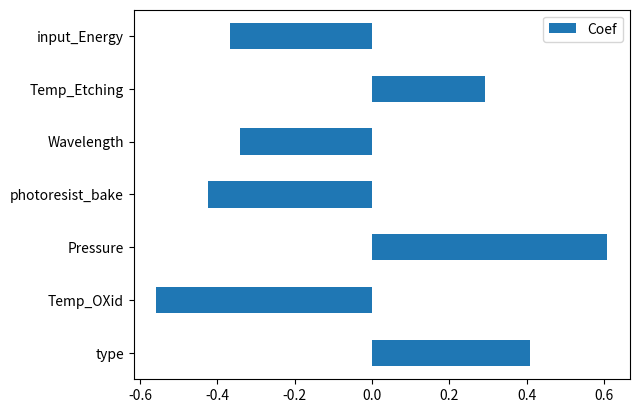

In [61]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [76]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from statsmodels.discrete.discrete_model import Logit

# 데이터 프레임에서 'Error' 열을 가져옴
y_train_ros = df_scaled["Error"]

ros = RandomOverSampler(sampling_strategy='minority', random_state=1004)
x_resampled, y_resampled = ros.fit_resample(df_scaled.iloc[:, :-1], y_train_ros)

x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=1004)



In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 구하기 위한 변수 설정
X = x_train_ros[['type', 'Temp_OXid', 'ppm', 'Pressure',
              'Oxid_time', 'N2_HMDS', 'pressure_HMDS',
              'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
              'spin1', 'spin2', 'spin3',
              'photoresist_bake', 'temp_softbake', 'time_softbake',
              'Wavelength', 'Energy_Exposure', 'Temp_Etching',
              'Source_Power', 'input_Energy', 'Temp_implantation',
              'Furance_Temp', 'RTA_Temp']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

              feature       VIF
0                type  2.147483
1           Temp_OXid  3.264783
2                 ppm  2.975396
3            Pressure  1.662155
4           Oxid_time  1.484836
5             N2_HMDS  1.087620
6       pressure_HMDS  1.104376
7           temp_HMDS  1.066456
8      temp_HMDS_bake  2.455749
9      time_HMDS_bake  1.095125
10              spin1  2.329720
11              spin2  1.967771
12              spin3  2.750109
13   photoresist_bake  2.441277
14      temp_softbake  2.051110
15      time_softbake  1.076971
16         Wavelength  1.687042
17    Energy_Exposure  1.713281
18       Temp_Etching  1.552131
19       Source_Power  2.129903
20       input_Energy  1.217424
21  Temp_implantation  2.116869
22       Furance_Temp  1.490457
23           RTA_Temp  2.298488


In [79]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.581812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2140
Method:                           MLE   Df Model:                           24
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1606
Time:                        17:44:38   Log-Likelihood:                -1259.6
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 9.019e-87
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4448      0.054     -8.203      0.000      -0.551      -0.338
type    

In [81]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.581812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                           23
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1606
Time:                        17:49:02   Log-Likelihood:                -1259.6
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 1.945e-87
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4448      0.054     -8.213      0.000      -0.551      -0.339
type    

In [82]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.581824
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2142
Method:                           MLE   Df Model:                           22
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1606
Time:                        17:49:24   Log-Likelihood:                -1259.6
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 4.207e-88
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4444      0.054     -8.211      0.000      -0.550      -0.338
type    

In [83]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
pressure_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.581883
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2143
Method:                           MLE   Df Model:                           21
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1605
Time:                        17:49:50   Log-Likelihood:                -1259.8
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 9.786e-89
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4429      0.054     -8.197      0.000      -0.549      -0.337
type    

In [84]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + ppm + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS_bake + time_HMDS_bake + spin1 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.581972
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                           20
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1604
Time:                        17:50:35   Log-Likelihood:                -1260.0
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 2.364e-89
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4440      0.054     -8.223      0.000      -0.550      -0.338
type    

In [85]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS_bake + time_HMDS_bake + spin1 + spin3 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.582086
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2145
Method:                           MLE   Df Model:                           19
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1602
Time:                        17:50:54   Log-Likelihood:                -1260.2
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 5.879e-90
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4434      0.054     -8.219      0.000      -0.549      -0.338
type    

In [86]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS_bake + time_HMDS_bake + spin1 +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.582322
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                           18
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1599
Time:                        17:51:15   Log-Likelihood:                -1260.7
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 1.832e-90
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4436      0.054     -8.220      0.000      -0.549      -0.338
type    

In [87]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS_bake + time_HMDS_bake +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation + RTA_Temp"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.582826
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                           17
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1591
Time:                        17:54:38   Log-Likelihood:                -1261.8
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 9.758e-91
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4438      0.054     -8.222      0.000      -0.550      -0.338
type    

In [88]:
from statsmodels.formula.api import logit

# 종속 변수와 독립 변수 데이터프레임을 합치기
x_train_ros['Error'] = y_train_ros

# 로지스틱 회귀 모델 생성
formula = """Error ~ type + Temp_OXid + Pressure + Oxid_time + N2_HMDS + 
temp_HMDS_bake + time_HMDS_bake +
photoresist_bake + temp_softbake + time_softbake + Wavelength + Energy_Exposure +
Temp_Etching + Source_Power + input_Energy + Temp_implantation"""

log_model = logit(formula, data=x_train_ros)
log_result = log_model.fit()

print(log_result.summary())


Optimization terminated successfully.
         Current function value: 0.583553
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Error   No. Observations:                 2165
Model:                          Logit   Df Residuals:                     2148
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1581
Time:                        17:55:03   Log-Likelihood:                -1263.4
converged:                       True   LL-Null:                       -1500.6
Covariance Type:            nonrobust   LLR p-value:                 8.096e-91
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4418      0.054     -8.191      0.000      -0.548      -0.336
type    

In [91]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과\n",y_pred_train_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_train["Error"],y_pred_train_class)),"\n")

y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과\n",y_pred_test_class.head(),"\n")
print("Confusionmatrix:\n{}".format(confusion_matrix(df_test["Error"],y_pred_test_class)),"\n")


Train 예측 결과
 1486    0
454     1
50      1
1120    0
425     0
dtype: int64 

Confusionmatrix:
[[625 293]
 [ 28  54]] 

Test 예측 결과
 1014    0
1576    0
122     1
94      0
550     0
dtype: int64 

Confusionmatrix:
[[449 180]
 [ 17  22]] 



In [92]:
print("Train 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_train["Error"],y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["Error"],y_pred_train_class),"\n"))
print(classification_report(df_train["Error"],y_pred_train_class, digits=3))


print("Test 예측/분류 결과")
print("Accuracy: {0:3f}\n".format(accuracy_score(df_test["Error"],y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["Error"],y_pred_test_class),"\n"))
print(classification_report(df_test["Error"],y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.679000

Confusion Matrix: 
[[625 293]
 [ 28  54]]
              precision    recall  f1-score   support

           0      0.957     0.681     0.796       918
           1      0.156     0.659     0.252        82

    accuracy                          0.679      1000
   macro avg      0.556     0.670     0.524      1000
weighted avg      0.891     0.679     0.751      1000

Test 예측/분류 결과
Accuracy: 0.705090

Confusion Matrix: 
[[449 180]
 [ 17  22]]
              precision    recall  f1-score   support

           0      0.964     0.714     0.820       629
           1      0.109     0.564     0.183        39

    accuracy                          0.705       668
   macro avg      0.536     0.639     0.501       668
weighted avg      0.914     0.705     0.783       668



<Axes: >

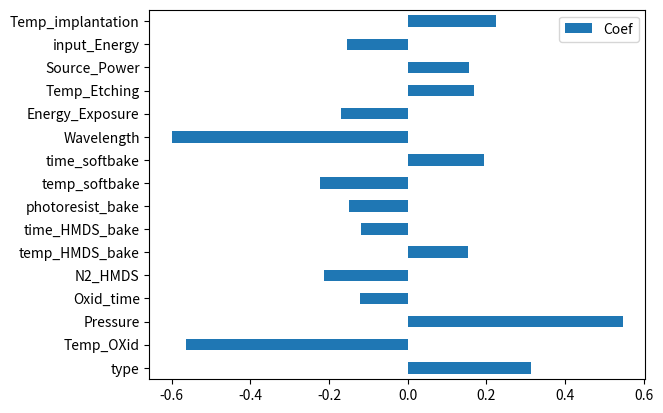

In [93]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")